## Predicting Mission Success Probability in Space Exploration 🚀🚀 (https://www.kaggle.com/datasets/sameerk2004/space-missions-dataset/data)
## Data Analysis & Forecasting & ML

### started on 25.06.2025 as a tribute to Axiom 4 mission, that includes Sławosz Uznański-Wiśniewski, polish Astronaut

## 📈 Introduction

The space mission dataset provides comprehensive information about various missions aimed at exploring celestial bodies, such as stars, exoplanets, and asteroids. Each mission entry contains critical details such as the mission ID, name, launch date, target type, mission type, distance from Earth, duration, cost, scientific yield, crew size, success rates, fuel consumption, payload weight, and launch vehicle. This dataset serves as a valuable resource for researchers, space agencies, and stakeholders looking to analyze the intricacies of space missions, assess their potential for success, and understand the resource investments required for exploring the universe.

## 🎯 Goals of the Notebook

Understanding Mission Characteristics: To analyze the various attributes of space missions, including their types, target destinations, costs, and durations, to identify patterns and trends in space exploration.

Evaluating Mission Success: To assess the success rates of different mission types and understand the factors contributing to their successes or failures, such as crew size, fuel consumption, and mission duration.

Cost-Benefit Analysis: To analyze the financial aspects of the missions, comparing mission costs against their scientific yields and success rates to determine overall value and efficiency.

Exploring Relationships Between Variables: To identify correlations and relationships between various mission attributes, such as the impact of distance from Earth on mission duration or the influence of payload weight on fuel consumption.

Predictive Modeling: To develop predictive models that can estimate mission outcomes based on historical data, providing insights for planning future missions.

Supporting Strategic Planning: To inform decision-making processes for space agencies and stakeholders regarding resource allocation, mission planning, and investment strategies in space exploration.

## 📊 Dataset Overview 

This dataset contains information about Crime Prediction , including:

Mission ID: A unique identifier for each mission, allowing for easy referencing and tracking.

Mission Name: The name of the mission, indicating its objective and target.

Launch Date: The scheduled date for launching the mission, providing a timeline for mission planning.

Target Type: The type of celestial body being targeted (e.g., Star, Exoplanet, Asteroid), indicating the mission's focus area.

Target Name: The specific name of the target celestial body (e.g., Titan, Betelgeuse), providing context for the mission's objectives.

Mission Type: The classification of the mission, such as Colonization, Exploration, or Mining, which defines its primary purpose.

Distance from Earth (light-years): The distance of the target from Earth, measured in light-years, which affects mission planning and resource allocation.

Mission Duration (years): The expected duration of the mission, measured in years, indicating the time commitment required for completion.

Mission Cost (billion USD): The estimated financial cost of the mission in billions of USD, which is crucial for budgeting and funding considerations.

Scientific Yield (points): A quantitative measure of the scientific value or output expected from the mission, often used to evaluate its success.

Crew Size: The number of crew members involved in the mission, which can influence operational dynamics and costs.

Mission Success (%): The percentage indicating the likelihood of mission success based on past data and projections, providing insights into mission feasibility.

Fuel Consumption (tons): The total amount of fuel required for the mission, measured in tons, which impacts mission planning and environmental considerations.

Payload Weight (tons): The weight of the payload carried by the mission, measured in tons, which affects fuel consumption and launch vehicle requirements.

Launch Vehicle: The type of vehicle used to launch the mission, which can influence mission costs and capabilities.

## Section 1: Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

import optuna
from sklearn.metrics import mean_squared_error, r2_score

## Section 2: Data Loading & Initial Inspection

### 1. Basic Information About the Dataset

In [2]:
df = pd.read_csv("data\\space_missions_dataset.csv")


In [3]:
df.head()

,Mission ID,Mission Name,Launch Date,Target Type,Target Name,Mission Type,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons),Launch Vehicle
0,MSN-0001,Mission-1,2025-01-01,Star,Titan,Colonization,7.05,5.2,526.68,64.3,21,100.0,731.88,99.78,SLS
1,MSN-0002,Mission-2,2025-01-08,Exoplanet,Betelgeuse,Colonization,41.76,23.0,234.08,84.4,72,89.6,4197.41,45.72,Starship
2,MSN-0003,Mission-3,2025-01-15,Asteroid,Mars,Exploration,49.22,28.8,218.68,98.6,16,98.6,4908.00,36.12,Starship
3,MSN-0004,Mission-4,2025-01-22,Exoplanet,Titan,Colonization,26.33,17.8,232.89,36.0,59,90.0,2569.05,40.67,Starship
4,MSN-0005,Mission-5,2025-01-29,Exoplanet,Proxima b,Mining,8.67,9.2,72.14,96.5,31,73.2,892.76,12.40,Starship


In [4]:
print('df rows:', df.shape[0])
print('df columns: ', df.shape[1])

df rows: 500
df columns:  15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Mission ID                         500 non-null    object 
 1   Mission Name                       500 non-null    object 
 2   Launch Date                        500 non-null    object 
 3   Target Type                        500 non-null    object 
 4   Target Name                        500 non-null    object 
 5   Mission Type                       500 non-null    object 
 6   Distance from Earth (light-years)  500 non-null    float64
 7   Mission Duration (years)           500 non-null    float64
 8   Mission Cost (billion USD)         500 non-null    float64
 9   Scientific Yield (points)          500 non-null    float64
 10  Crew Size                          500 non-null    int64  
 11  Mission Success (%)                500 non-null    float64

### 2. Descriptive Statistics

In [6]:
df.describe() #numeric columns

,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,25.483060,15.736800,277.300280,55.223400,50.118000,92.616600,2543.522140,50.355620
std,14.942128,7.578316,141.137422,26.446232,27.660989,9.391094,1492.964489,28.227546
min,0.350000,1.400000,13.320000,10.000000,1.000000,66.000000,18.060000,1.020000
25%,11.750000,8.900000,149.960000,33.775000,27.000000,85.500000,1177.315000,25.567500
50%,26.185000,16.400000,282.170000,54.400000,50.000000,98.600000,2597.985000,50.995000
75%,38.570000,22.200000,399.995000,79.025000,74.000000,100.000000,3859.355000,74.482500
max,49.900000,29.500000,538.320000,99.800000,99.000000,100.000000,5018.600000,99.780000


### 3. Checking and handling missing data

In [7]:
df.isnull().sum()

Mission ID                           0
Mission Name                         0
Launch Date                          0
Target Type                          0
Target Name                          0
Mission Type                         0
Distance from Earth (light-years)    0
Mission Duration (years)             0
Mission Cost (billion USD)           0
Scientific Yield (points)            0
Crew Size                            0
Mission Success (%)                  0
Fuel Consumption (tons)              0
Payload Weight (tons)                0
Launch Vehicle                       0
dtype: int64

<Axes: >

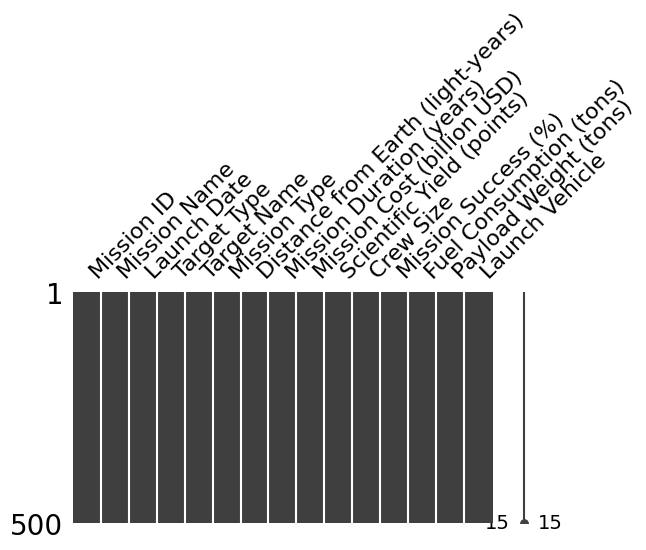

In [8]:
import missingno as mnso
mnso.matrix(df, figsize=(6,3))


In [9]:
df.duplicated().sum()

0

### Unique values

In [10]:
cat_cols = df.select_dtypes(exclude=np.number).columns

In [11]:
for col in cat_cols:
  if col not in ['Launch Date','Mission Name','Mission ID']:
    print(f'{col} : {df[col].unique()}')

Target Type : ['Star' 'Exoplanet' 'Asteroid' 'Moon' 'Planet']
Target Name : ['Titan' 'Betelgeuse' 'Mars' 'Proxima b' 'Ceres' 'Io' 'Europa']
Mission Type : ['Colonization' 'Exploration' 'Mining' 'Research']
Launch Vehicle : ['SLS' 'Starship' 'Ariane 6' 'Falcon Heavy']


## Section 3: Data Cleaning

In [12]:
df['Launch Date'] = pd.to_datetime(df['Launch Date'])

In [13]:
df['launch_Day_of_Week'] = df['Launch Date'].dt.day_name()
df['launch_Month'] = df['Launch Date'].dt.month_name()
df['launch_Year'] = pd.to_datetime(df['Launch Date']).dt.year

In [14]:
df.columns

Index(['Mission ID', 'Mission Name', 'Launch Date', 'Target Type',
       'Target Name', 'Mission Type', 'Distance from Earth (light-years)',
       'Mission Duration (years)', 'Mission Cost (billion USD)',
       'Scientific Yield (points)', 'Crew Size', 'Mission Success (%)',
       'Fuel Consumption (tons)', 'Payload Weight (tons)', 'Launch Vehicle',
       'launch_Day_of_Week', 'launch_Month', 'launch_Year'],
      dtype='object')

In [15]:
df.drop(columns=['Launch Date', 'Mission ID' , 'Mission Name'], inplace=True)

In [16]:
df.isna().sum()

Target Type                          0
Target Name                          0
Mission Type                         0
Distance from Earth (light-years)    0
Mission Duration (years)             0
Mission Cost (billion USD)           0
Scientific Yield (points)            0
Crew Size                            0
Mission Success (%)                  0
Fuel Consumption (tons)              0
Payload Weight (tons)                0
Launch Vehicle                       0
launch_Day_of_Week                   0
launch_Month                         0
launch_Year                          0
dtype: int64

## Section 4: EDA

In [17]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

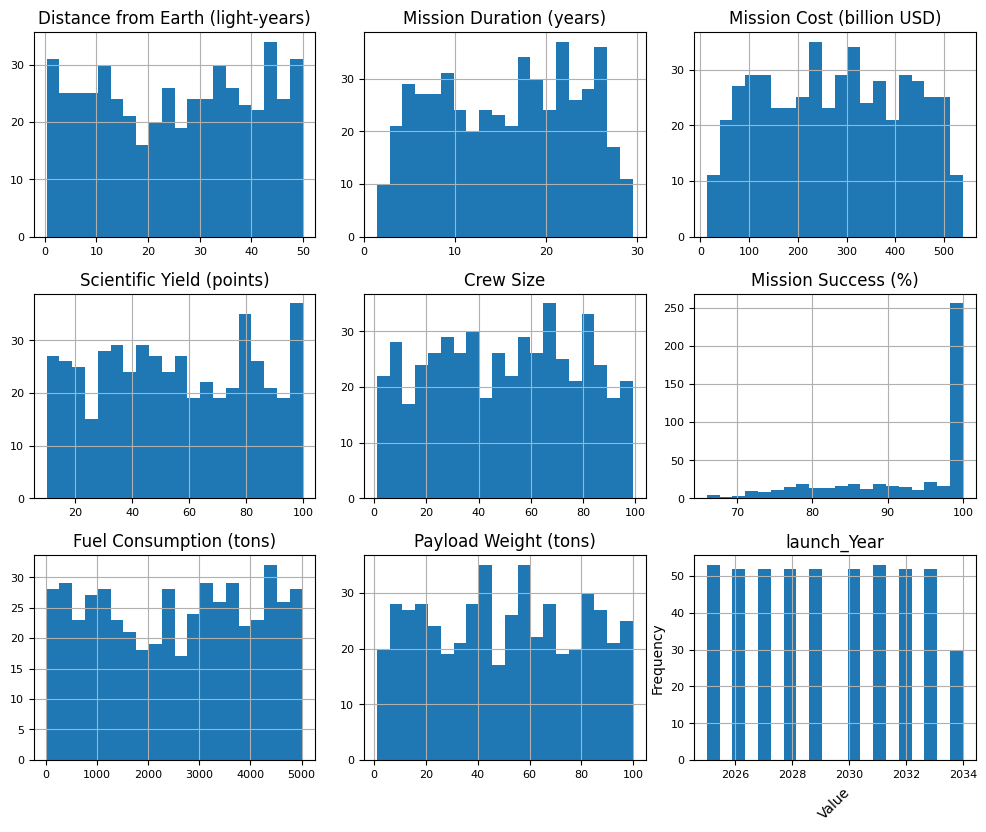

In [18]:
df[num_cols].hist(figsize=(10, 8), bins=20, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.xlabel('Value', fontsize=10 , rotation=45)
plt.ylabel('Frequency', fontsize=10)
plt.show()

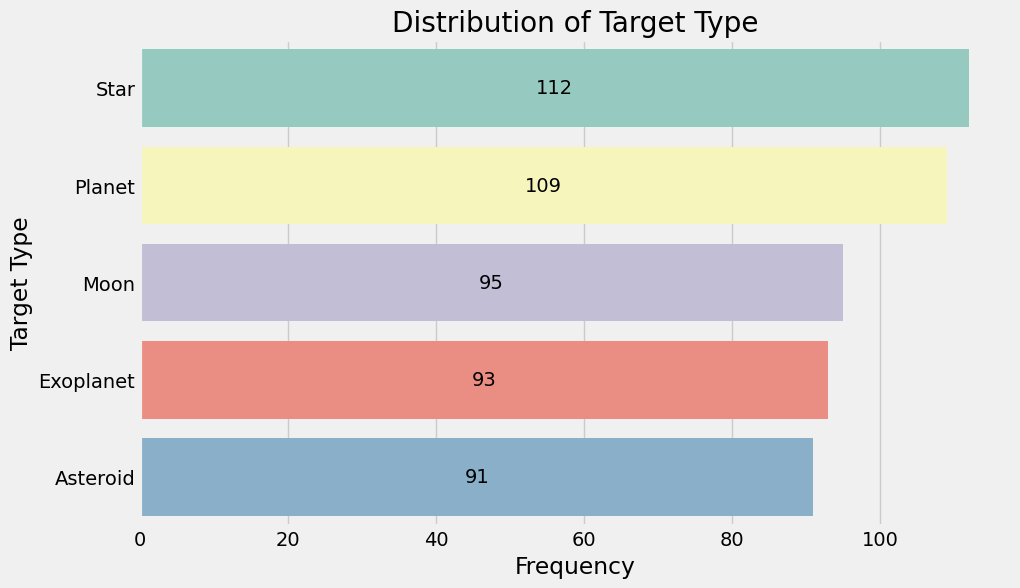

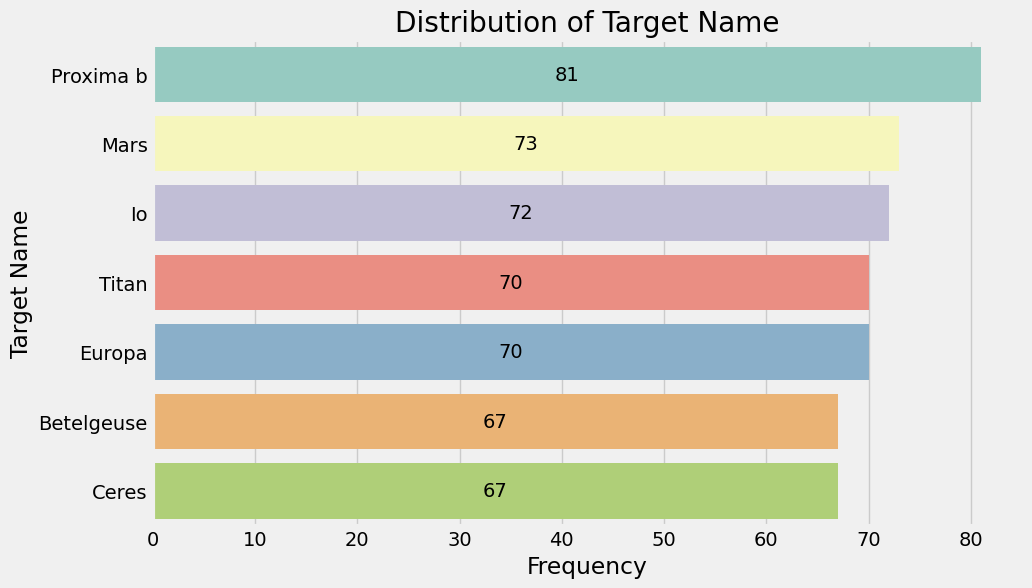

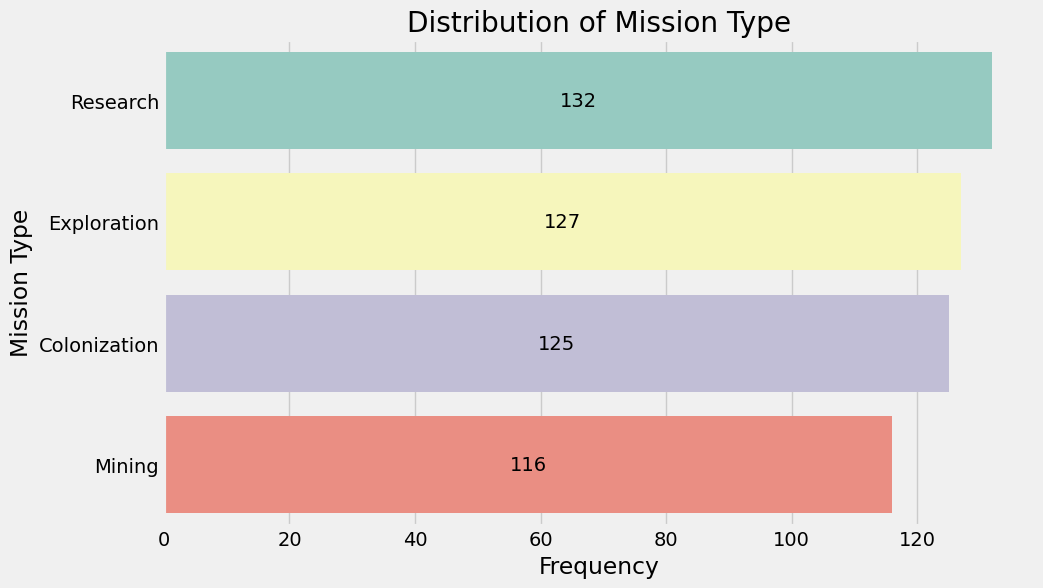

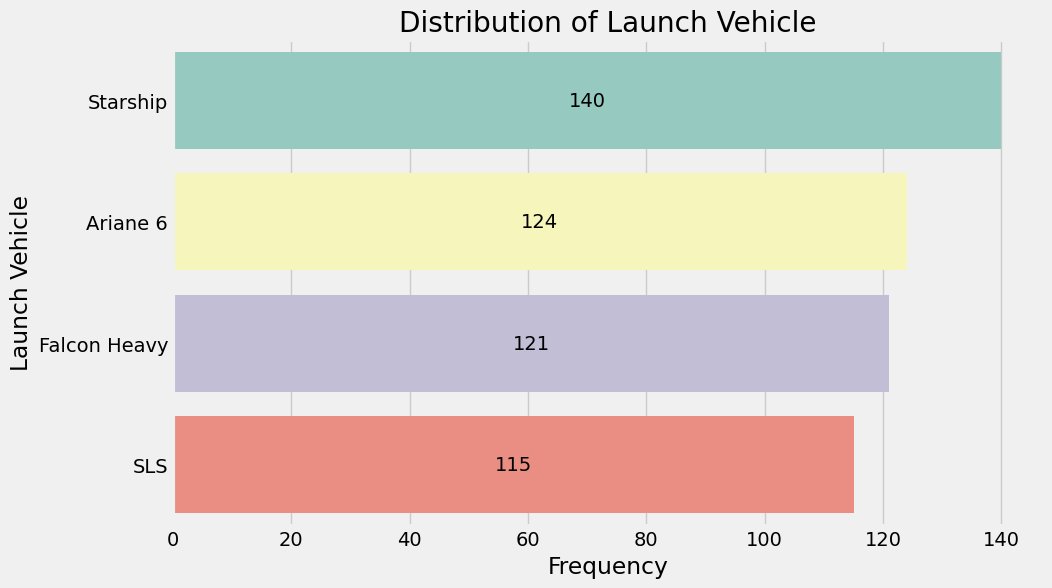

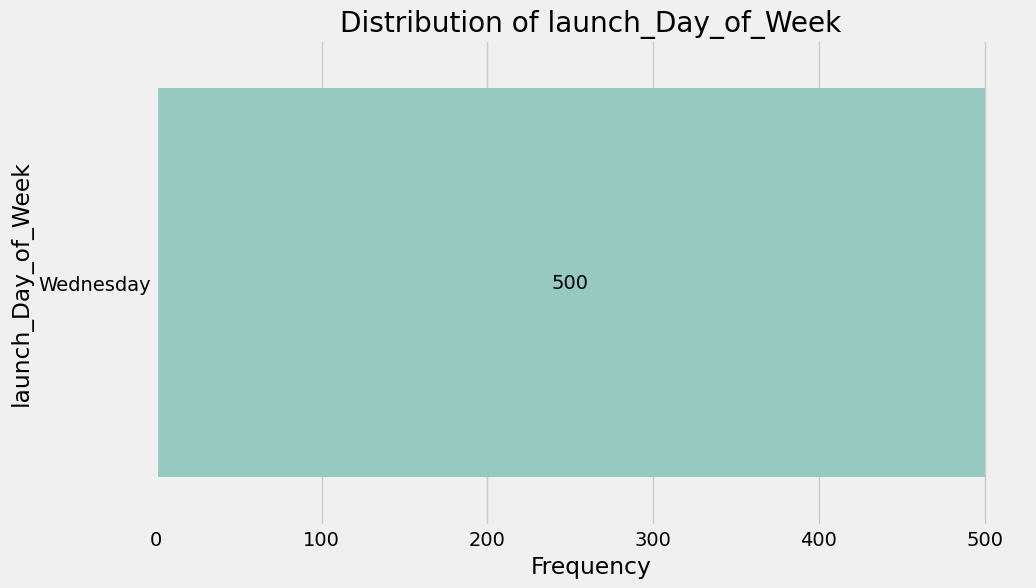

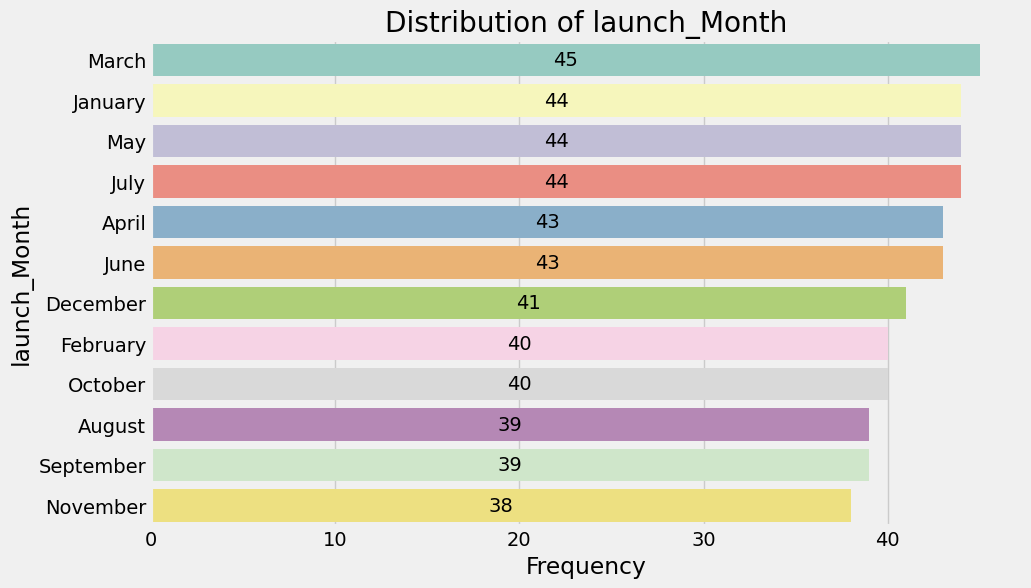

In [19]:
for col in cat_cols :
  if col not in ['Address','Neighborhood']:
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(10,6))
    count_prim = df[col].value_counts()
    ax = sns.barplot(y=count_prim.index, x=count_prim.values, palette="Set3")
    plt.title(f'Distribution of {col}')
    plt.ylabel(col)
    plt.xlabel('Frequency')

    for p in ax.patches:
      width = p.get_width()
      ax.text(width / 2,
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha="center",
            va="center")

    plt.show()

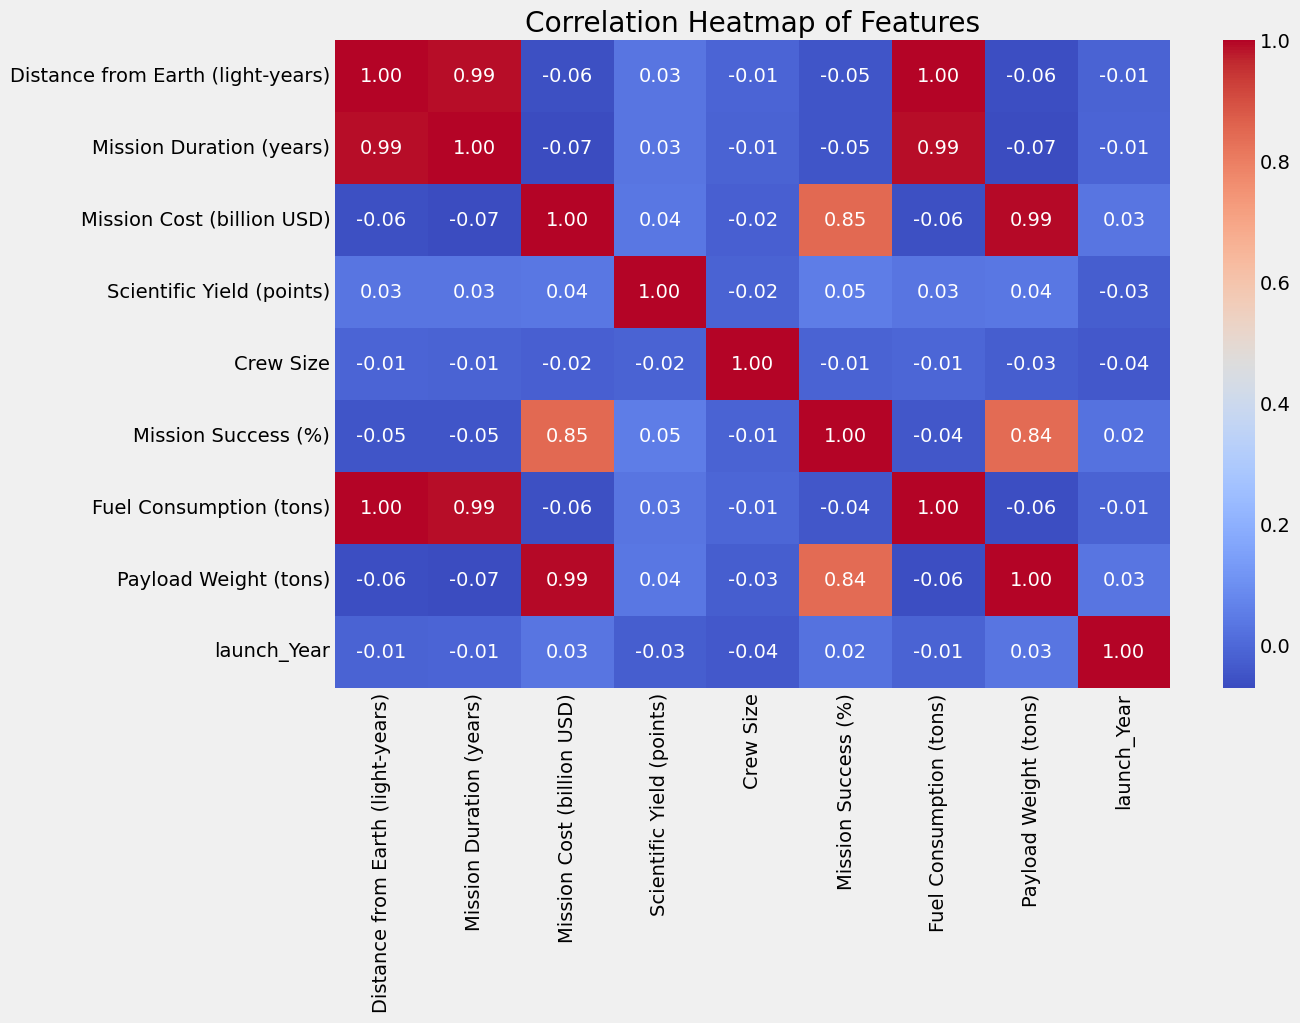

In [20]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

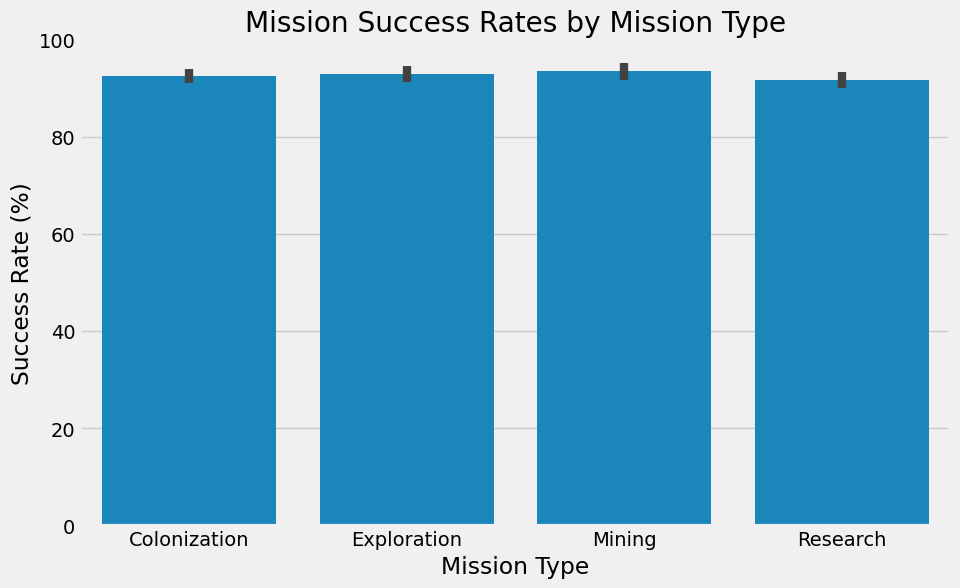

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Mission Type', y='Mission Success (%)', data=df)
plt.title('Mission Success Rates by Mission Type')
plt.xlabel('Mission Type')
plt.ylabel('Success Rate (%)')
plt.ylim(0, 100)
plt.show()

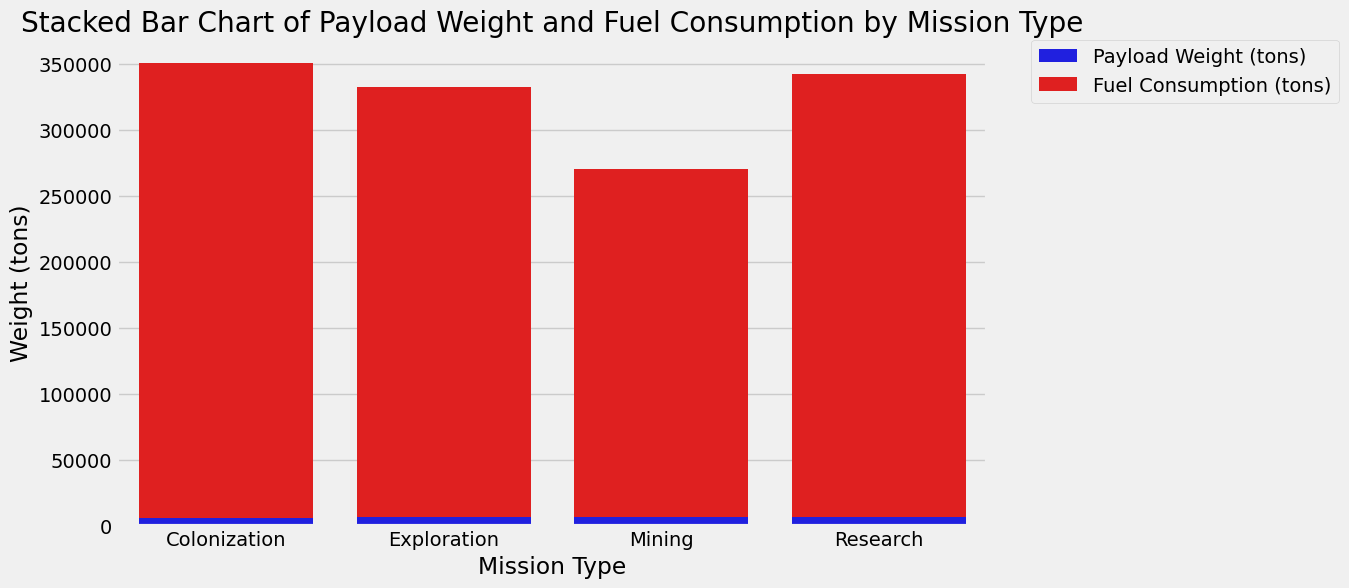

In [22]:
payload_weight_df = df.groupby('Mission Type')['Payload Weight (tons)'].sum().reset_index()
fuel_consumption_df = df.groupby('Mission Type')['Fuel Consumption (tons)'].sum().reset_index()

stacked_data = pd.merge(payload_weight_df, fuel_consumption_df, on='Mission Type', suffixes=('_Payload', '_Fuel'))

plt.figure(figsize=(10, 6))
sns.barplot(x='Mission Type', y='Payload Weight (tons)', data=stacked_data, label='Payload Weight (tons)', color='blue')
sns.barplot(x='Mission Type', y='Fuel Consumption (tons)', data=stacked_data, label='Fuel Consumption (tons)', color='red', bottom=stacked_data['Payload Weight (tons)'])
plt.title('Stacked Bar Chart of Payload Weight and Fuel Consumption by Mission Type')
plt.xlabel('Mission Type')
plt.ylabel('Weight (tons)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()